In [7]:
import pandas as pd
import random
import base64
from io import BytesIO
from IPython.display import HTML

Error processing Avenger.js: cannot identify image file './files\\Avenger.js'
Error processing style.css: cannot identify image file './files\\style.css'


,File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Full Path,image
0,23UP-cat-articleLarge.webp,RGB,WEBP,3,0.02,600,464,./files\23UP-cat-articleLarge.webp,
1,2560px-A-Cat.jpg,RGB,JPEG,3,0.68,2560,1714,./files\2560px-A-Cat.jpg,
2,Adorable-animal-cat-20787.jpg,RGB,JPEG,3,1.10,3456,2304,./files\Adorable-animal-cat-20787.jpg,
3,beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg,RGB,JPEG,3,0.09,1200,901,./files\beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg,
4,cat-1045782_640.jpg,RGB,JPEG,3,0.13,640,437,./files\cat-1045782_640.jpg,
5,FELV-cat.jpg,RGB,JPEG,3,0.10,703,463,./files\FELV-cat.jpg,
6,Gatos_cats_7_cropped.png,RGB,JPEG,3,0.18,462,616,./files\Gatos_cats_7_cropped.png,
7,GettyImages-1194409229-crop-4477e44.webp,RGB,WEBP,3,0.08,940,530,./files\GettyImages-1194409229-crop-4477e44.webp,
8,istockphoto-1322123064-612x612.jpg,RGB,JPEG,3,0.03,612,408,./files\istockphoto-1322123064-612x612.jpg,
9,June_odd-eyed-cat.jpg,RGB,JPEG,3,0.95,2370,1927,./files\June_odd-eyed-cat.jpg,

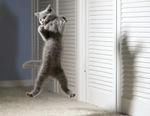
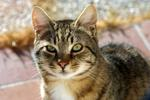
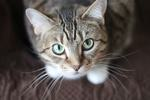
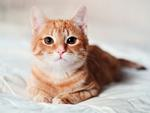
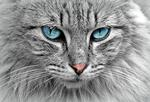
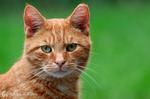
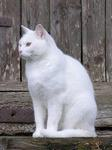
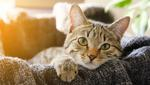
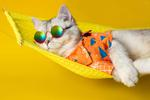
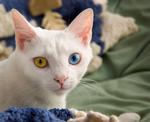
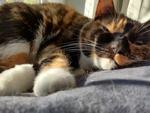

In [23]:
def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i


def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()


def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'


def get_image_info(folder_path):
    image_data = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        if os.path.isfile(file_path):
            try:
                img = Image.open(file_path)
                img_format = img.format
                img_mode = img.mode
                img_size = os.path.getsize(file_path) / (1024 * 1024)  # in megabytes
                img_size = round(img_size, 2)
                img_channels = len(img.getbands())
                img_width, img_height = img.size
                reduced_img = img.resize((100, 100))  # change the size as needed
                image_data.append({
                    'File Name': file_name,
                    'Color Model': img_mode,
                    'Format': img_format,
                    'Channels': img_channels,
                    'File Size (MB)': img_size,
                    'Width': img_width,
                    'Height': img_height,
                    'Full Path': file_path,
                    'image': get_thumbnail(file_path)
                })

            except Exception as e:
                print(f"Error processing {file_name}: {e}")

    df = pd.DataFrame(image_data)
    return df


# Example usage:
folder_path = "./files"
img_set = get_image_info(folder_path)
HTML(img_set.to_html(formatters={'image': image_formatter}, escape=False))

In [25]:
import os
import random
from PIL import Image, ImageFilter, ImageOps


def crop_and_resize(image, target_size):
    width, height = image.size
    new_size = min(width, height)
    left = (width - new_size) // 2
    top = (height - new_size) // 2
    right = (width + new_size) // 2
    bottom = (height + new_size) // 2

    cropped_image = image.crop((left, top, right, bottom))
    resized_image = cropped_image.resize((target_size, target_size))

    return resized_image


def apply_random_color_filter(image):
    filters = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#800080', '#00FFFF']
    selected_filter = random.choice(filters)
    colorized_image = ImageOps.colorize(image.convert("L"), selected_filter, selected_filter)

    blended_image = Image.blend(image, colorized_image.convert("RGB"), alpha=0.5)  # Adjust alpha as needed

    return blended_image


def create_poster(folder_path, output_name, columns, rows):
    images = []

    for _ in range(columns * rows):
        random_image_path = random.choice(os.listdir(folder_path))
        image_path = os.path.join(folder_path, random_image_path)
        image = Image.open(image_path)

        # Transform the image
        image = crop_and_resize(image, 533)
        image = image.resize((500, 500))
        image = apply_random_color_filter(image)
        images.append(image)

    # Create the poster
    poster = Image.new('RGB', (columns * 500, rows * 500))

    for i in range(rows):
        for j in range(columns):
            index = i * columns + j
            poster.paste(images[index], (j * 500, i * 500))

    # Save the poster
    poster.save(output_name + '.png')
    print(f"Poster '{output_name}.png' has been created.")


# Example usage:
folder_path = "./images"

create_poster(folder_path, 'poster1', 3, 2)
create_poster(folder_path, 'poster2', 3, 4)
create_poster(folder_path, 'poster3', 6, 6)

Poster 'poster1.png' has been created.
Poster 'poster2.png' has been created.
Poster 'poster3.png' has been created.
